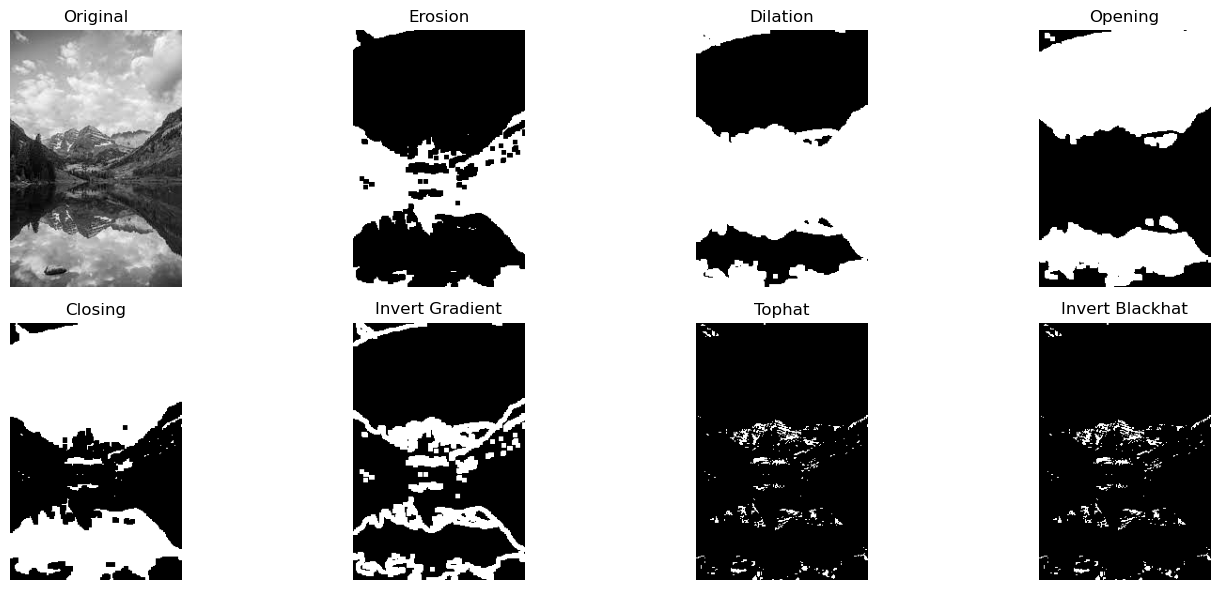

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("cv2.jpg", 0)

# Otsu threshold
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Kernel
kernel = np.ones((5,5), np.uint8)

# Morphological operations
invert = cv2.bitwise_not(binr)
erosion = cv2.erode(invert, kernel, iterations=1)
dilation = cv2.dilate(invert, kernel, iterations=1)
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel)
invert_gradient = cv2.morphologyEx(invert, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(binr, cv2.MORPH_TOPHAT, kernel)
invert_blackhat = cv2.morphologyEx(invert, cv2.MORPH_BLACKHAT, kernel)

# Titles & images
titles = ['Original', 'Erosion', 'Dilation', 'Opening', 'Closing', 
          'Invert Gradient', 'Tophat', 'Invert Blackhat']
images = [img, erosion, dilation, opening, closing, invert_gradient, tophat, invert_blackhat]

# Plot all in one figure
plt.figure(figsize=(15,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
